In [123]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sympy import *

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 20


%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

init_printing(use_unicode=False, wrap_line=True)

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

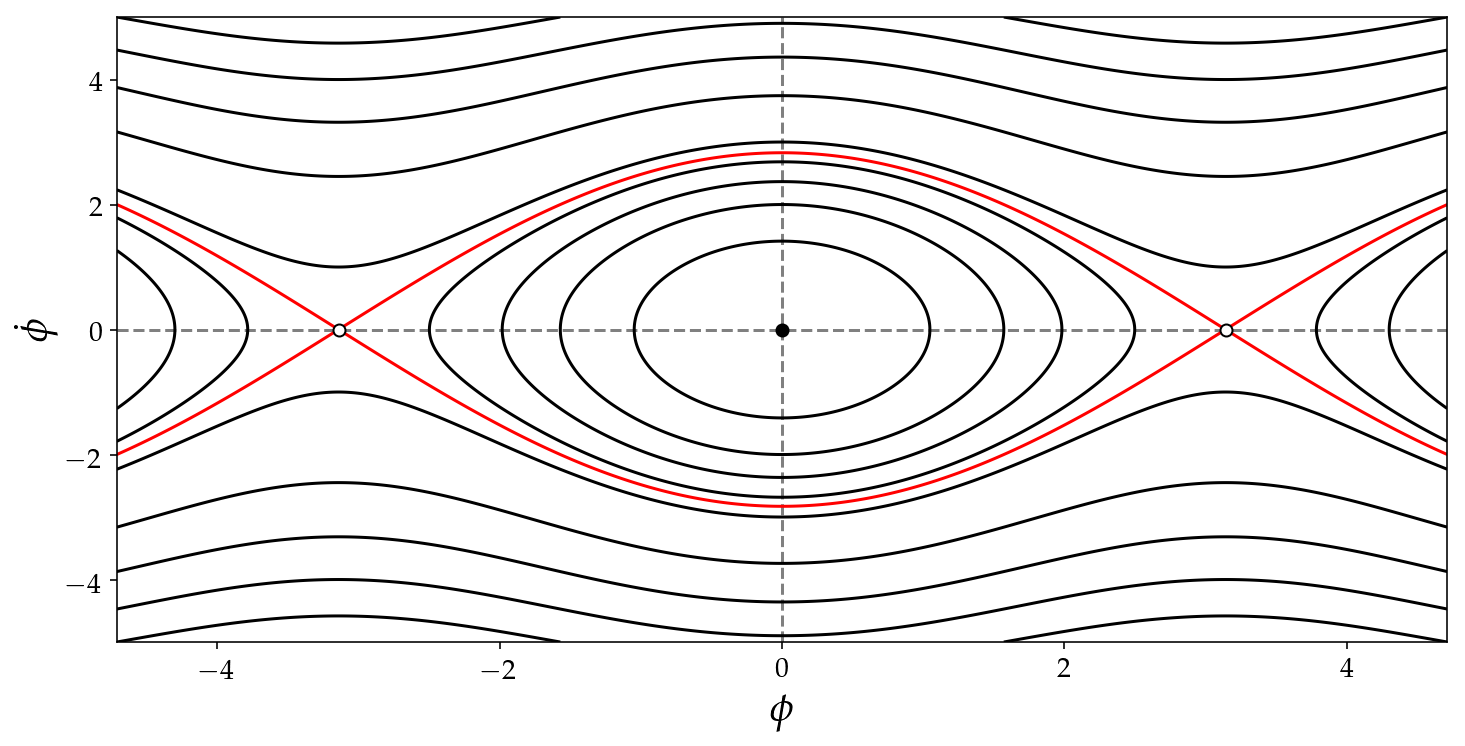

In [125]:
def plot_hamiltonian(ax, delta, eps):      
    """
    Calculate the Hamiltonian as a function of x and y coordinates, defined
    as x=sqrt(2*Phi)*cos(phi), y=sqrt(2*Phi)*sin(phi)
    """      
    # Define the Hamiltonian in Cartesian coordinates
    H = lambda phi, J: J**2/2 + delta*J - eps*np.cos(phi)

    # Define (x,y) grid
    phi = np.linspace(-3*np.pi/2, 3*np.pi/2, 2000)
    J = np.linspace(-5, 5, 2000)

    phi_, J_ = np.meshgrid(phi, J)

    # Value of H at the separatrix
    H_saddle = eps

    levels = np.array([1.6,1.5, 1.4, 1.25, 0.8,0.6, 0.2,\
                        -.5, -2., -4., -8., -15., -20, -50])*H_saddle

    
    ax.axvline(0, color='grey', zorder=1, linestyle='--')
    ax.axhline(0, color='grey', zorder=1, linestyle='--')
    
    separatrix = ax.contour(phi_, J_, H(phi_,J_), levels=[H_saddle], colors='red',zorder=2)
    for line in separatrix.collections:
        line.set_linestyle('solid')
        
    contour = ax.contour(phi_, J_, H(phi_,J_),colors='black')
    contour = ax.contour(phi_, J_, H(phi_,J_), levels=[ -1, 0.8, 1.6], colors='black')


    for line in contour.collections:
        line.set_linestyle('solid')

    # Plot the fixed points
    x_saddle = np.array([np.pi, -np.pi])
    y_saddle = np.zeros(2)
    x_centers = 0
    y_centers = 0

    ax.scatter(x_centers, y_centers, color='black', zorder=3)
    ax.scatter(x_saddle, y_saddle, facecolor='white', edgecolor='black', zorder=3)        

fig, ax = plt.subplots(figsize=(10, 5))
plt.tight_layout()

plot_hamiltonian(ax, 0, 2)

ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\dot{\phi}$')

plt.savefig('../figures/analytical_model/pendulum.pdf', bbox_inches='tight')